## Zig Zag Implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def clr(lr_min,lr_max,x):
  """ return lr rate at a x """
  lr = lr_min + (lr_max-lr_min) * (1-x)
  return lr

def fn_x(iteration, stepsize):
  """ get x for iteration at stepsize"""
  cycle = np.floor(1+(iteration/stepsize)/2)
  temp = (iteration/stepsize) - 2* cycle + 1
  x = np.abs(temp)
  return x

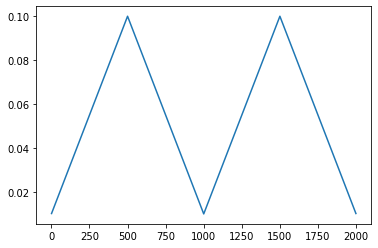

In [2]:
x = []
y = [] 

for i in range(1,2000):
  t = fn_x(iteration=i, stepsize=500)
  x.append(t)
  y.append(clr(lr_min=.01,lr_max=.1,x=t))
plt.plot(range(1,2000),y)

## Davidnet training

In [3]:
pwd

'/content'

In [4]:
!git clone https://github.com/theschoolof-ai/JEDI.git

fatal: destination path 'JEDI' already exists and is not an empty directory.


In [5]:
cd /content/JEDI/tsai.jedi

/content/JEDI/tsai.jedi


In [6]:
import sys
sys.path.append('Models/')
from S7 import model_summary
from s11_Davidnet import s11_david

In [ ]:
!pip install albumentations==0.4.6

In [7]:
sys.path.append(".")
from lr_finder import LRFinder
import torch.nn as nn
from dataloader import test_loader_CIFAR10_alb, train_loader_CIFAR10_s11
from aftereffects import get_image_with_target, plots
import matplotlib.pyplot as plt
import torch.optim as optim
import sys
import config

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Extracting ../data/cifar-10-python.tar.gz to ../data
Files already downloaded and verified




In [12]:
model_ = s11_david().to(config.device)
print(model_summary(model_, config.input_size_CIFAR10))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3          [-1, 128, 32, 32]          73,728
         MaxPool2d-4          [-1, 128, 16, 16]               0
       BatchNorm2d-5          [-1, 128, 16, 16]             256
            Conv2d-6          [-1, 128, 16, 16]         147,584
       BatchNorm2d-7          [-1, 128, 16, 16]             256
            Conv2d-8          [-1, 128, 16, 16]         147,584
       BatchNorm2d-9          [-1, 128, 16, 16]             256
           Conv2d-10          [-1, 256, 16, 16]         294,912
        MaxPool2d-11            [-1, 256, 8, 8]               0
      BatchNorm2d-12            [-1, 256, 8, 8]             512
           Conv2d-13            [-1, 512, 8, 8]       1,179,648
        MaxPool2d-14            [-1, 51

In [9]:
import torch
torch.cuda.is_available()

True


Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 4.43E-01


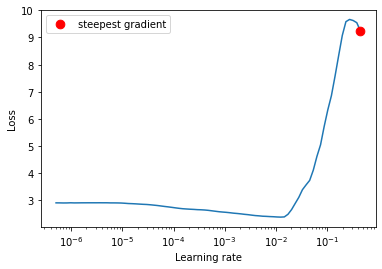

In [11]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_.parameters(), lr=1e-7, momentum=0.9, weight_decay=5e-4)
lr_finder = LRFinder(model_, optimizer, criterion, device="cuda")
lr_finder.range_test(train_loader_CIFAR10_s11, end_lr=1, num_iter=100, step_mode="exp")
lr_finder.plot()
lr_finder.reset()

In [14]:
from torch.optim.lr_scheduler import StepLR, OneCycleLR
from Engine_train_test import train_cyclic, test
optimizer = optim.SGD(model_.parameters(), lr=9.33E-02, momentum=0.9, weight_decay=5e-4)
scheduler = OneCycleLR(optimizer,max_lr=9.33E-02,epochs = 24,steps_per_epoch = len(train_loader_CIFAR10_s11),
                       pct_start = 0.21,div_factor = 10,final_div_factor = 1)
valid_acc = []
valid_loss = []
train_acc = []
train_loss = []
for epoch in range(1, 25):
    train_a, train_l = train_cyclic(model_, config.device, train_loader_CIFAR10_s11, optimizer, epoch,
                             is_cyclicLR = True,scheduler = scheduler,l1_regularization=[0, 1])
    train_acc.append(train_a)
    train_loss.append(train_l)
    valid_a, valid_l = test(model_, config.device, test_loader_CIFAR10_alb) 
    # Appending to loss and accuracy lists
    valid_acc.append(valid_a)
    train_loss.append(valid_l)

Epoch: 1,LR: 0.017256802766108664.
Train set: train Average loss: 1.2544, train_Accuracy: 24335/50000 (48.6700%)



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 5372/10000 (53.7200%)



Epoch: 2,LR: 0.03804403721221181.
Train set: train Average loss: 1.1688, train_Accuracy: 26997/50000 (53.9940%)



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 5700/10000 (57.0000%)



Epoch: 3,LR: 0.06384240918529671.
Train set: train Average loss: 1.1988, train_Accuracy: 29044/50000 (58.0880%)



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 6416/10000 (64.1600%)



Epoch: 4,LR: 0.08491041070311497.
Train set: train Average loss: 1.1890, train_Accuracy: 31485/50000 (62.9700%)



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 6379/10000 (63.7900%)



Epoch: 5,LR: 0.09329272950139014.
Train set: train Average loss: 0.9923, train_Accuracy: 33318/50000 (66.6360%)



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0016, Accuracy: 7324/10000 (73.2400%)



Epoch: 6,LR: 0.09275865026137027.
Train set: train Average loss: 0.7486, train_Accuracy: 35249/50000 (70.4980%)



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0015, Accuracy: 7496/10000 (74.9600%)



Epoch: 7,LR: 0.09108257342337629.
Train set: train Average loss: 0.7392, train_Accuracy: 36670/50000 (73.3400%)



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0014, Accuracy: 7629/10000 (76.2900%)



Epoch: 8,LR: 0.0883171694798904.
Train set: train Average loss: 0.6349, train_Accuracy: 37811/50000 (75.6220%)



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0013, Accuracy: 7937/10000 (79.3700%)



Epoch: 9,LR: 0.08453818933080287.
Train set: train Average loss: 0.5367, train_Accuracy: 38409/50000 (76.8180%)



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0012, Accuracy: 7968/10000 (79.6800%)



Epoch: 10,LR: 0.07984914810548029.
Train set: train Average loss: 0.5400, train_Accuracy: 39288/50000 (78.5760%)



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0011, Accuracy: 8204/10000 (82.0400%)



Epoch: 11,LR: 0.07437848964059163.
Train set: train Average loss: 0.5632, train_Accuracy: 39986/50000 (79.9720%)



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0009, Accuracy: 8414/10000 (84.1400%)



Epoch: 12,LR: 0.06827606810217432.
Train set: train Average loss: 0.5027, train_Accuracy: 40610/50000 (81.2200%)



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0010, Accuracy: 8219/10000 (82.1900%)



Epoch: 13,LR: 0.06170904312856394.
Train set: train Average loss: 0.5776, train_Accuracy: 41296/50000 (82.5920%)



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0009, Accuracy: 8463/10000 (84.6300%)



Epoch: 14,LR: 0.0548573009358501.
Train set: train Average loss: 0.4617, train_Accuracy: 41523/50000 (83.0460%)



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0008, Accuracy: 8608/10000 (86.0800%)



Epoch: 15,LR: 0.04790852681251907.
Train set: train Average loss: 0.4302, train_Accuracy: 42111/50000 (84.2220%)



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0008, Accuracy: 8660/10000 (86.6000%)



Epoch: 16,LR: 0.04105306397921193.
Train set: train Average loss: 0.3791, train_Accuracy: 42690/50000 (85.3800%)



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0008, Accuracy: 8668/10000 (86.6800%)



Epoch: 17,LR: 0.03447869964148703.
Train set: train Average loss: 0.4227, train_Accuracy: 43054/50000 (86.1080%)



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0009, Accuracy: 8520/10000 (85.2000%)



Epoch: 18,LR: 0.02836552105783058.
Train set: train Average loss: 0.3497, train_Accuracy: 43325/50000 (86.6500%)



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0007, Accuracy: 8877/10000 (88.7700%)



Epoch: 19,LR: 0.022880982527276432.
Train set: train Average loss: 0.3959, train_Accuracy: 43943/50000 (87.8860%)



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0007, Accuracy: 8736/10000 (87.3600%)



Epoch: 20,LR: 0.018175318423414404.
Train set: train Average loss: 0.2804, train_Accuracy: 44284/50000 (88.5680%)



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0007, Accuracy: 8827/10000 (88.2700%)



Epoch: 21,LR: 0.014377427922543333.
Train set: train Average loss: 0.3353, train_Accuracy: 44736/50000 (89.4720%)



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0006, Accuracy: 8977/10000 (89.7700%)



Epoch: 22,LR: 0.011591344152916846.
Train set: train Average loss: 0.3271, train_Accuracy: 45082/50000 (90.1640%)



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0006, Accuracy: 9016/10000 (90.1600%)



Epoch: 23,LR: 0.009893384483364926.
Train set: train Average loss: 0.2998, train_Accuracy: 45325/50000 (90.6500%)



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0006, Accuracy: 8989/10000 (89.8900%)



Epoch: 24,LR: 0.009330060011569673.
Train set: train Average loss: 0.2598, train_Accuracy: 45733/50000 (91.4660%)


Test set: Average loss: 0.0006, Accuracy: 9031/10000 (90.3100%)

